# Explore
get some

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wrangle import wrangle_grades

In [7]:
#plt.rc sets dafaults for matplotlib figures
plt.rc('font', size=13)
plt.rc('figure', figsize=(13,7))

In [8]:
df = wrangle_grades()
df.head()

,exam1,exam2,exam3,final_grade
0,100,90,95,96
1,98,93,96,95
2,85,83,87,87
3,83,80,86,85
4,93,90,96,97


In [9]:
from sklearn.model_selection import train_test_split

In [11]:
train_and_validate, test = train_test_split(df, test_size=.1, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.1, random_state=123)

train.shape, validate.shape, test.shape

((81, 4), (10, 4), (11, 4))

# continuous and continuous

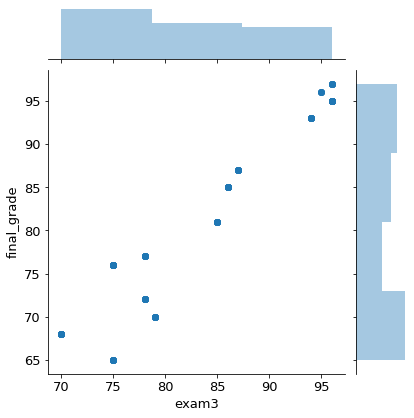

In [15]:
# explore variables
sns.jointplot(x='exam3',y='final_grade', data=train)

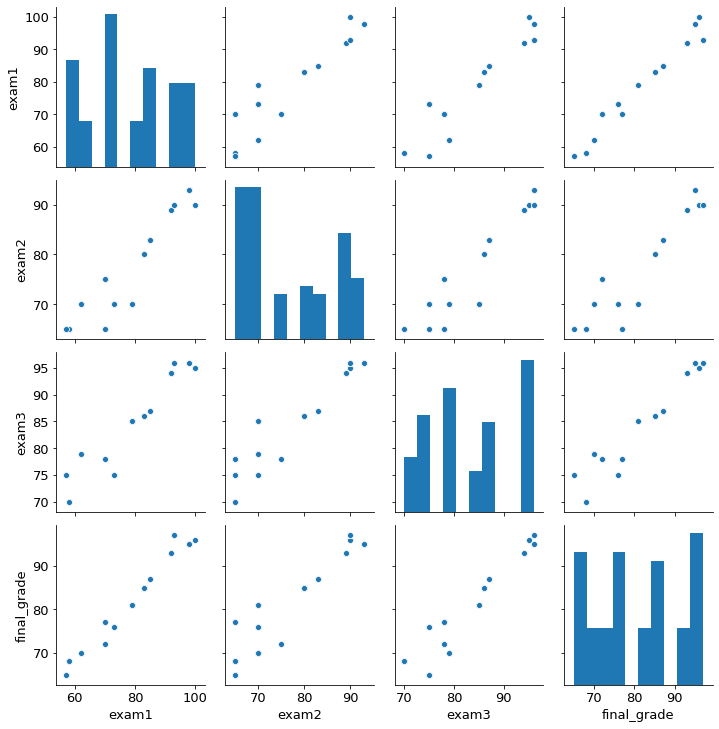

In [17]:
# pairplot displays all combinations of variables
sns.pairplot(train)

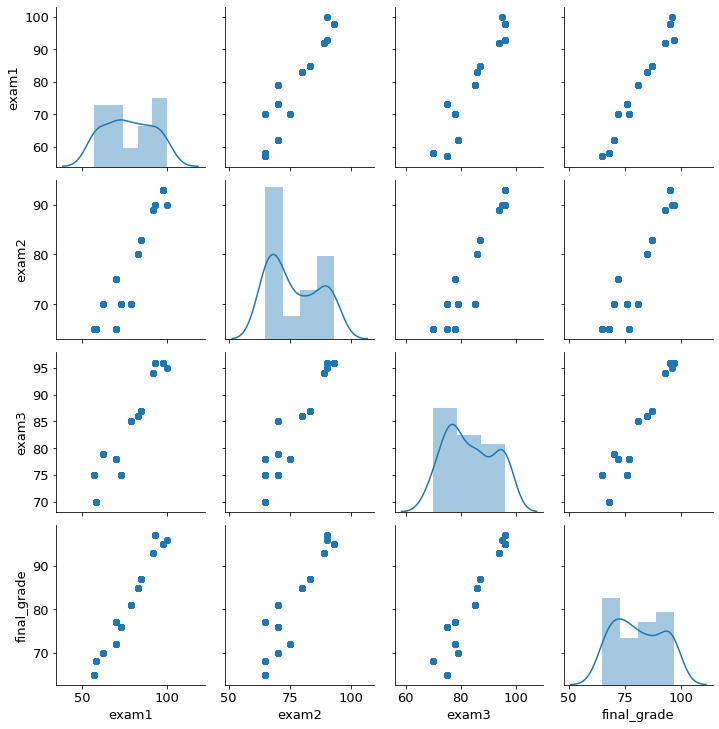

In [20]:
g = sns.PairGrid(train)
g.map_diag(sns.distplot)
g.map_offdiag(plt.scatter)

In [22]:
train.corr()

,exam1,exam2,exam3,final_grade
exam1,1.000000,0.934099,0.947911,0.985155
exam2,0.934099,1.000000,0.938353,0.926828
exam3,0.947911,0.938353,1.000000,0.954037
final_grade,0.985155,0.926828,0.954037,1.000000


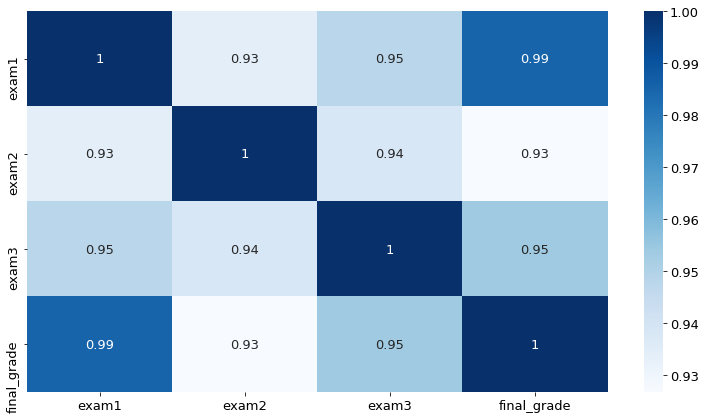

In [24]:
sns.heatmap(train.corr(), cmap='Blues', annot=True)

In [ ]:
# takeaways
# exam 2 has the lowest correlation with the final grade
# exam 1 has the highest correlation


# continuous and categorical

In [25]:
train.head()

,exam1,exam2,exam3,final_grade
1,98,93,96,95
20,73,70,75,76
78,100,90,95,96
29,83,80,86,85
75,58,65,70,68


In [27]:
pd.cut(train.exam1, bins=[0,70,80,90,105]).value_counts()

(0, 70]      32
(90, 105]    22
(70, 80]     14
(80, 90]     13
Name: exam1, dtype: int64

In [29]:
pd.cut(train.exam1, bins=[0,70,80,90,105], labels=['F','C','B','A']).value_counts()

F    32
A    22
C    14
B    13
Name: exam1, dtype: int64

In [30]:
train['exam1_letter_grade'] = pd.cut(train.exam1, bins=[0,70,80,90,105], labels=['F','C','B','A'])
train.head()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,exam1,exam2,exam3,final_grade,exam1_letter_grade
1,98,93,96,95,A
20,73,70,75,76,C
78,100,90,95,96,A
29,83,80,86,85,B
75,58,65,70,68,F


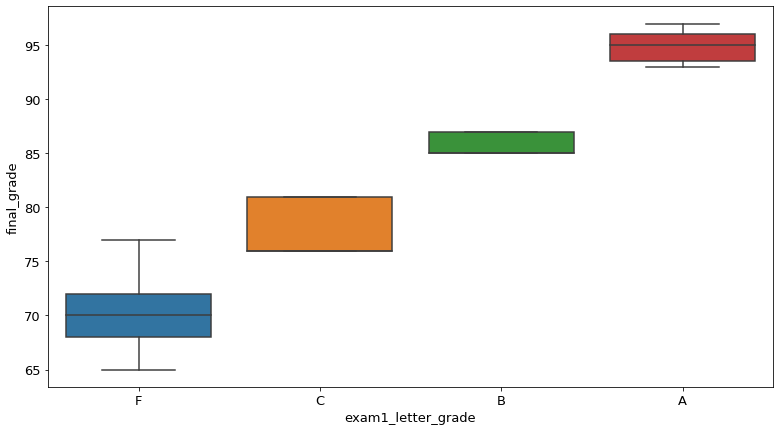

In [31]:
sns.boxplot(data=train, y='final_grade', x='exam1_letter_grade')

In [ ]:
# Takeaways: students with F's not only have the lowest grade, but also the most variation in grades
#-maybe due to different study habits or workflows?
#b's have the least variation
#-maybe because there are fewer observations

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

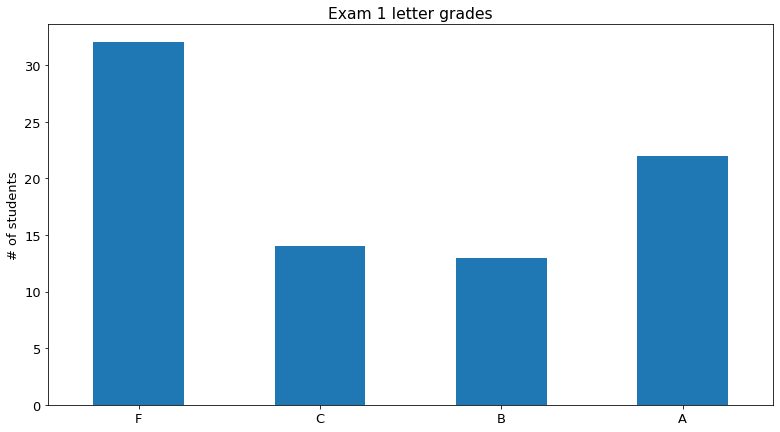

In [41]:
train.exam1_letter_grade.value_counts().sort_index().plot.bar()
plt.ylabel('# of students')
plt.title('Exam 1 letter grades')
plt.xticks(rotation=0)

In [ ]:
# takeaways
#-not significantly fewer 'b' observations

In [44]:
### make a fake category ###
np.random.seed(123)
train['classroom'] = np.random.choice(['one','two'], train.shape[0])
train.head()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,exam1,exam2,exam3,final_grade,exam1_letter_grade,classroom
1,98,93,96,95,A,one
20,73,70,75,76,C,two
78,100,90,95,96,A,one
29,83,80,86,85,B,one
75,58,65,70,68,F,one


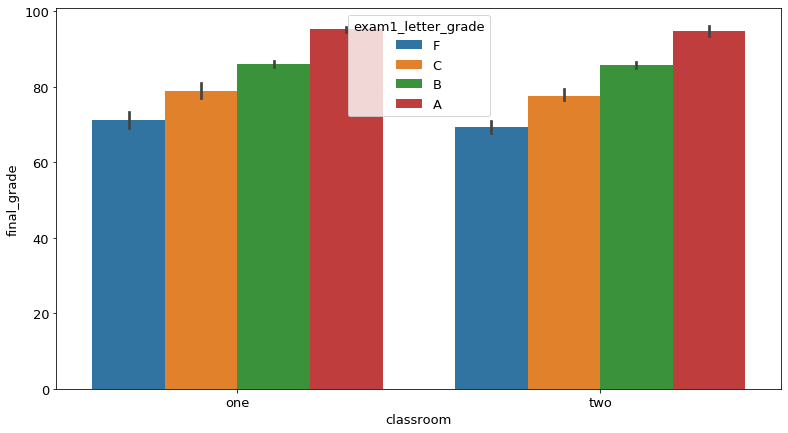

In [46]:
sns.barplot(data=train, y='final_grade', x='classroom', hue='exam1_letter_grade')

In [47]:
# takeaways: there is not a significane difference between classroom grades
# classroom doesnt impact final grade? Lets run a hypoth test
# - Ho: there is no difference in final grade between classroom one and classroom two
# - Ha: there is no difference in final grade between classroom one and classroom two


In [48]:
from scipy import stats
stats.ttest_ind(
    train[train.classroom == 'one'].final_grade,
    train[train.classroom == 'two'].final_grade,
    equal_var=False)

Ttest_indResult(statistic=2.280491002945514, pvalue=0.025327198363860267)

In [ ]:
#  and 